# MTE 544 Lab 4 Report

|Stephen Wang|Ajit Rakhra|Howard Dong|
|:-:|:-:|:-:|
|x2274wan|a3rakhra|h53dong|
|20821034|20832703|20847639|

Station 3, Robot 14 on Fri Dec 1 at 8:30 AM

# Path Planning

A\* search algorithm is used to find a path on the occupancy grid, which can then be turned into a trajectory in the Cartesian birds-eye plane.
The algorithm can be summarized in the following list.
Each cell in the occupancy grid is represented as a custom `Node` datatype.
A `Node` contains its parent and its location;
`Node`s can subtract each other to calculate the heuristic distance;
`Node`s can compare with each other to return `True` when their locations match.

1. Initialize the list of unvisited pixels with a `Node` representing the start
1. For each unvisited pixel:
    1. Remove that pixel and add it to the list of visited pixels
    1. Create `Node`s for the 8 surrounding pixels
    1. For each neighbouring pixel:
        1. Skip if it's already been visited, otherwise
        1. Update the "real" cost to be 1 + its parent
        1. Update the heuristic cost either with Euclidean distance or Manhattan distance
        1. Update its total cost as the sum of the above
        1. If it's in the unvisited list and the heuristic cost is lower
            1. Add it to the list of unvisited nodes
1. Repeat until there is no more node in the unvisited list

Following this algorithm, every pixel will be visited but in contrast to Dijkstra's algorithm, the pattern of descending cost between the pixels/`Node`s will also be influenced by the heuristic cost.

In [6]:
%config InlineBackend.figure_formats = ["svg"]

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL

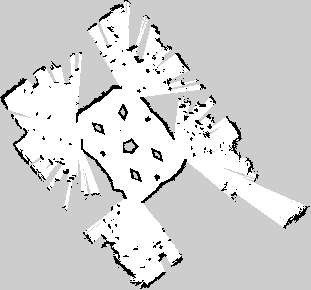

In [8]:
PIL.Image.open("room.pgm")